In [9]:
# Machine Learning Pipeline Execution
# Este notebook ejecuta secuencialmente todos los pasos del pipeline ML

# Importaciones necesarias
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip list | findstr pydantic
# Asegurarse de que podemos importar desde la raíz del proyecto
# (ajusta esto si es necesario según la estructura de tu proyecto)
sys.path.append('..')



pydantic                2.11.5
pydantic_core           2.33.2
pydantic-settings       2.9.1


In [10]:
# ===== DETECCIÓN AUTOMÁTICA Y UNIVERSAL DE RUTAS =====
import os
import sys
import subprocess
from pathlib import Path
import platform
import getpass

print(f"📂 Directorio inicial: {os.getcwd()}")
print(f"🖥️ Sistema operativo: {platform.system()}")
print(f"👤 Usuario: {getpass.getuser()}")

def find_project_root():
    """Busca la raíz del proyecto de forma inteligente y universal."""
    print("🔍 Buscando raíz del proyecto...")
    
    def is_project_root(path):
        """Verifica si un directorio es la raíz del proyecto SP500."""
        indicators = ["src/sp500_analysis", "pipelines", "data", "notebooks"]
        return all((path / indicator).exists() for indicator in indicators)
    
    # Estrategia 1: Buscar desde el directorio actual hacia arriba
    current = Path.cwd()
    for _ in range(10):  # Máximo 10 niveles hacia arriba
        if is_project_root(current):
            print(f"✅ Proyecto encontrado (método 1): {current}")
            return current
        current = current.parent
    
    # Estrategia 2: Buscar en ubicaciones comunes del sistema
    search_locations = [
        Path.home() / "Desktop",
        Path.home() / "Documents", 
        Path.home() / "Documentos",  # Para sistemas en español
        Path.home(),  # Home directory directo
    ]
    
    # Agregar ubicaciones específicas por OS
    if platform.system() == "Windows":
        search_locations.extend([
            Path("C:/"),
            Path.home().parent  # C:/Users
        ])
    elif platform.system() == "Darwin":  # macOS
        search_locations.append(Path("/Users"))
    elif platform.system() == "Linux":
        search_locations.append(Path("/home"))
    
    for location in search_locations:
        if not location.exists():
            continue
            
        try:
            print(f"🔍 Buscando en: {location}")
            for item in location.iterdir():
                if not item.is_dir():
                    continue
                    
                name_lower = item.name.lower()
                # Buscar directorios que contengan palabras clave del proyecto
                if any(keyword in name_lower for keyword in ['sp500', 'pipeline', 'analisis']):
                    print(f"🎯 Candidato encontrado: {item}")
                    if is_project_root(item):
                        print(f"✅ Proyecto encontrado (método 2): {item}")
                        return item
                    
                    # Buscar un nivel más profundo
                    try:
                        for subitem in item.iterdir():
                            if subitem.is_dir() and is_project_root(subitem):
                                print(f"✅ Proyecto encontrado (método 2b): {subitem}")
                                return subitem
                    except (PermissionError, OSError):
                        continue
                        
        except (PermissionError, OSError):
            print(f"⚠️ Sin permisos para acceder a: {location}")
            continue
    
    # Estrategia 3: Usar directorio actual como fallback
    print(f"⚠️ Usando directorio actual como fallback: {Path.cwd()}")
    return Path.cwd()

# Encontrar y cambiar al directorio del proyecto
project_root = find_project_root()
os.chdir(project_root)
print(f"📂 Directorio cambiado a: {os.getcwd()}")

# PASO 1: Instalar dependencias críticas en el entorno del kernel
print("\n🔧 Instalando dependencias en el entorno del kernel...")
critical_packages = ['pydantic-settings', 'optuna', 'python-dotenv']
for package in critical_packages:
    try:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package, '--quiet'])
        print(f"✅ {package} verificado/instalado")
    except Exception as e:
        print(f"⚠️ Error con {package}: {e}")

# PASO 2: Usar la raíz del proyecto detectada automáticamente
current_dir = Path.cwd()
print(f"\n📁 Directorio de trabajo actual: {current_dir}")

# Verificar que estamos en el lugar correcto usando la variable project_root ya detectada
if (project_root / "src").exists() and (project_root / "notebooks").exists():
    print(f"✅ Confirmado: Estamos en el directorio correcto del proyecto")
else:
    print(f"⚠️ Advertencia: No se detecta estructura de proyecto típica")
    print(f"   - src/: {'✅' if (project_root / 'src').exists() else '❌'}")
    print(f"   - notebooks/: {'✅' if (project_root / 'notebooks').exists() else '❌'}")

src_path = project_root / "src"
pipelines_path = project_root / "pipelines"

print(f"🎯 Raíz del proyecto confirmada: {project_root}")
print(f"📦 Src path: {src_path}")
print(f"⚙️ Pipelines path: {pipelines_path}")

# PASO 3: Verificar que los directorios existen
if not src_path.exists():
    print(f"❌ No existe: {src_path}")
else:
    print(f"✅ Existe: {src_path}")

if not pipelines_path.exists():
    print(f"❌ No existe: {pipelines_path}")
else:
    print(f"✅ Existe: {pipelines_path}")

# PASO 4: Agregar rutas al Python path AL INICIO
paths_to_add = [str(project_root), str(src_path), str(pipelines_path)]

for path in paths_to_add:
    if path not in sys.path:
        sys.path.insert(0, path)
        print(f"✅ Agregado al path: {path}")

# PASO 5: Cambiar directorio de trabajo a la raíz del proyecto
os.chdir(project_root)
print(f"🔄 Directorio cambiado a: {os.getcwd()}")

# PASO 6: Verificar que las importaciones funcionan
print("\n🧪 Probando importaciones...")
try:
    import pydantic_settings
    print("✅ pydantic_settings importado correctamente")
except ImportError as e:
    print(f"❌ pydantic_settings falla: {e}")

try:
    import optuna
    print("✅ optuna importado correctamente")
except ImportError as e:
    print(f"❌ optuna falla: {e}")

try:
    from sp500_analysis.config.settings import settings
    print("✅ settings importado correctamente")
    print("🎉 ¡Importaciones funcionando! Configuración completa disponible")
    IMPORTS_WORKING = True
except ImportError as e:
    print(f"❌ settings falla: {e}")
    IMPORTS_WORKING = False

# PASO 7: Mostrar información del entorno Python
print(f"\n🐍 Python executable: {sys.executable}")
print(f"📦 Python path (primeros 3): {sys.path[:3]}")
print(f"📂 Directorio final de trabajo: {os.getcwd()}")

📂 Directorio inicial: c:\Users
🖥️ Sistema operativo: Windows
👤 Usuario: saule
🔍 Buscando raíz del proyecto...
🔍 Buscando en: C:\Users\saule\Desktop
🎯 Candidato encontrado: C:\Users\saule\Desktop\Pipeline
🎯 Candidato encontrado: C:\Users\saule\Desktop\Pipeline_Junio
✅ Proyecto encontrado (método 2b): C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
📂 Directorio cambiado a: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis

🔧 Instalando dependencias en el entorno del kernel...
✅ pydantic-settings verificado/instalado
✅ optuna verificado/instalado
✅ python-dotenv verificado/instalado

📁 Directorio de trabajo actual: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
✅ Confirmado: Estamos en el directorio correcto del proyecto
🎯 Raíz del proyecto confirmada: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
📦 Src path: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\src
⚙️ Pipelines path: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Anali

In [ ]:
# ✅ Este notebook ahora usa tu código completo y corregido
# Los archivos se generarán correctamente con el paso 0 mejorado

print("📋 Pipeline ML - Configuración completada")
print("🎯 Todos los pasos han sido corregidos para usar las rutas correctas")
print("🚀 ¡Listo para ejecutar el pipeline completo!")

SyntaxError: invalid decimal literal (3223127794.py, line 57)

In [11]:
# Instalar dependencias y reiniciar kernel si es necesario
print("🔧 Configurando entorno para usar archivos .py originales...")

import subprocess
import sys
import importlib

# Instalar dependencias críticas
critical_packages = ['pydantic-settings', 'python-dotenv', 'typing-inspection']

for package in critical_packages:
    try:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package, '--quiet'])
        print(f"✅ {package} verificado")
    except:
        print(f"⚠️ Error con {package}")

# Verificar que se pueden importar
try:
    import pydantic_settings
    print("✅ pydantic_settings disponible")
    can_use_original = True
except ImportError:
    print("❌ pydantic_settings no disponible")
    can_use_original = False

if can_use_original:
    print("🎉 ¡Perfecto! Podemos usar los archivos .py originales")
else:
    print("⚠️ Usaremos versión simplificada por compatibilidad")
    
# Variable global para decidir qué versión usar
USE_ORIGINAL_PY = can_use_original

🔧 Configurando entorno para usar archivos .py originales...
✅ pydantic-settings verificado
✅ python-dotenv verificado
✅ typing-inspection verificado
✅ pydantic_settings disponible
🎉 ¡Perfecto! Podemos usar los archivos .py originales


In [23]:
# Paso 0: Preprocesamiento inicial
print("🚀 Ejecutando paso 0: Preprocesamiento inicial con tu código completo")
print("=" * 60)

import os
import sys
import importlib.util
from pathlib import Path

# Definir la ruta exacta del proyecto (sabemos que está en Desktop/Pipeline_Junio/SP500_INDEX_Analisis)
current_path = Path.cwd()
print(f"📂 Directorio actual del notebook: {current_path}")

# Ruta fija al proyecto
project_root = Path(r"C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis")
print(f"📂 Project root (ruta fija): {project_root}")

# Verificar que la ruta del proyecto existe
if not project_root.exists():
    print(f"❌ Error: No se encuentra el directorio del proyecto: {project_root}")
    print("🔍 Probando rutas alternativas...")
    # Intentar encontrar el proyecto en otros lugares
    possible_paths = [
        Path.home() / "Desktop" / "Pipeline_Junio" / "SP500_INDEX_Analisis",
        Path.home() / "Documents" / "Pipeline_Junio" / "SP500_INDEX_Analisis",
        Path("SP500_INDEX_Analisis"),
        Path("..") / "SP500_INDEX_Analisis",
        Path("../..") / "SP500_INDEX_Analisis"
    ]
    
    for path in possible_paths:
        if path.exists() and (path / "pipelines").exists():
            project_root = path.absolute()
            print(f"✅ Encontrado en: {project_root}")
            break
    else:
        raise FileNotFoundError(f"No se puede encontrar el proyecto SP500_INDEX_Analisis")

# Cambiar al directorio raíz del proyecto
os.chdir(str(project_root))
print(f"📂 Directorio actual: {os.getcwd()}")

# Verificar que existe el archivo
preprocess_file = project_root / "pipelines" / "ml" / "00_step_preprocess.py"
print(f"🔍 Buscando archivo: {preprocess_file}")

if not preprocess_file.exists():
    print(f"❌ Error: No se encuentra {preprocess_file}")
    print("📂 Listando contenido del project_root:")
    if project_root.exists():
        for f in project_root.iterdir():
            if f.is_dir():
                print(f"  📁 {f.name}/")
            else:
                print(f"  📄 {f.name}")
    print("\n📂 Listando contenido de pipelines/:")
    pipelines_dir = project_root / "pipelines"
    if pipelines_dir.exists():
        for f in pipelines_dir.iterdir():
            if f.is_dir():
                print(f"  📁 {f.name}/")
            else:
                print(f"  📄 {f.name}")
    print("\n📂 Listando contenido de pipelines/ml/:")
    ml_dir = project_root / "pipelines" / "ml"
    if ml_dir.exists():
        for f in ml_dir.iterdir():
            if f.is_dir():
                print(f"  📁 {f.name}/")
            else:
                print(f"  📄 {f.name}")
    raise FileNotFoundError(f"No se encuentra {preprocess_file}")

print("✅ Archivo encontrado correctamente!")

# Importar el archivo que empieza con número usando importlib
sys.path.insert(0, str(project_root))
spec = importlib.util.spec_from_file_location("step_preprocess", str(preprocess_file))
step_preprocess = importlib.util.module_from_spec(spec)
spec.loader.exec_module(step_preprocess)

# Ejecutar todos los procesadores usando el wrapper correcto
print("\n🎯 Ejecutando TODOS los procesadores (6 total)...")
success = step_preprocess.ejecutar_todos_los_procesadores()

if success:
    print("\n🎉 ¡Paso 0 completado exitosamente!")
    print("✅ Los 6 archivos han sido generados en data/0_raw/")
else:
    print("\n⚠️ Paso 0 completado con algunos errores")
    print("📋 Revisa los logs para más detalles")

# Regresar al directorio de notebooks si existe
try:
    notebooks_dir = project_root / "notebooks"
    if notebooks_dir.exists():
        os.chdir(str(notebooks_dir))
        print(f"🔄 Regresado a: {os.getcwd()}")
except:
    print("⚠️ No se pudo regresar al directorio de notebooks")



🚀 Ejecutando paso 0: Preprocesamiento inicial con tu código completo
📂 Directorio actual del notebook: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\notebooks
📂 Project root (ruta fija): C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
📂 Directorio actual: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
🔍 Buscando archivo: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\pipelines\ml\00_step_preprocess.py
✅ Archivo encontrado correctamente!
🔧 PROJECT_ROOT corregido manualmente: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
✅ Código completo de legacy_step_0.py cargado con rutas corregidas
📁 PROJECT_ROOT final: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
✅ Usando tu código completo step_0_preprocess.py

🎯 Ejecutando TODOS los procesadores (6 total)...
🚀 INICIANDO STEP 0: PREPROCESS - USANDO TU CÓDIGO COMPLETO
📂 PROJECT_ROOT: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
📂 CONFIG_FILE: C:\Users\saule\Des

2025-06-16 09:33:50,779 - INFO - ================================================================================
2025-06-16 09:33:50,784 - INFO - INICIANDO PROCESO: EconomicDataProcessor
2025-06-16 09:33:50,788 - INFO - Archivo de configuración: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\data/Data Engineering.xlsx
2025-06-16 09:33:50,795 - INFO - Directorio raíz de datos: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\data/0_raw
2025-06-16 09:33:50,800 - INFO - Fecha y hora: 2025-06-16 09:33:50
2025-06-16 09:33:50,809 - INFO - ================================================================================
2025-06-16 09:33:50,813 - INFO - Leyendo archivo de configuración...
2025-06-16 09:33:51,375 - INFO - Se encontraron 23 configuraciones para procesar
2025-06-16 09:33:51,388 - INFO - 
Procesando: US_ISM_Manufacturing (business_confidence)
2025-06-16 09:33:51,391 - INFO - - Archivo: US_ISM_Manufacturing.xlsx
2025-06-16 09:33:51,394 - INFO - - Columna TARGE

✅ Completado

2️⃣ MyInvesting Normal...


2025-06-16 09:34:08,821 - INFO - Ejemplos de fechas convertidas para Australia_10Y_Bond: [Timestamp('2025-06-04 00:00:00'), Timestamp('2025-06-03 00:00:00'), Timestamp('2025-06-02 00:00:00'), Timestamp('2025-05-30 00:00:00'), Timestamp('2025-05-29 00:00:00')]
2025-06-16 09:34:08,846 - INFO - Formato numérico detectado para Australia_10Y_Bond: americano
2025-06-16 09:34:08,861 - INFO - Para Australia_10Y_Bond (columna Date), la fecha mínima es 2014-01-05 00:00:00 y la fecha máxima es 2025-06-04 00:00:00
2025-06-16 09:34:08,863 - INFO - - Australia_10Y_Bond: 3854 filas procesadas, periodo: 2014-01-05 a 2025-06-04
2025-06-16 09:34:08,866 - INFO - 
Procesando: Italy_10Y_Bond (bond)
2025-06-16 09:34:08,869 - INFO - - Archivo: Italy_10Y_Bond
2025-06-16 09:34:08,871 - INFO - - Columna TARGET: PRICE
2025-06-16 09:34:08,873 - INFO - - Ruta encontrada: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\data/0_raw\bond\Italy_10Y_Bond.csv
2025-06-16 09:34:08,893 - INFO - Columna de fecha d

✅ Completado

3️⃣ FRED Data...


2025-06-16 09:36:22,833 - INFO - Primeras fechas convertidas: [Timestamp('2014-01-02 00:00:00'), Timestamp('2014-01-03 00:00:00'), Timestamp('2014-01-06 00:00:00'), Timestamp('2014-01-07 00:00:00'), Timestamp('2014-01-08 00:00:00')]
2025-06-16 09:36:22,846 - INFO - - Valores no nulos en TARGET: 2855
2025-06-16 09:36:22,847 - INFO - - Periodo: 2014-01-02 a 2025-06-02
2025-06-16 09:36:22,847 - INFO - - Cobertura: 100.00%
2025-06-16 09:36:22,850 - INFO - 
Procesando: US_2Y_Treasury (bond)
2025-06-16 09:36:22,851 - INFO - - Archivo: US_2Y_Treasury.csv
2025-06-16 09:36:22,851 - INFO - - Columna TARGET: DGS2
2025-06-16 09:36:22,852 - INFO - - Ruta encontrada: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\data/0_raw\bond\US_2Y_Treasury.csv
2025-06-16 09:36:22,860 - INFO - - Filas encontradas: 2978
2025-06-16 09:36:22,863 - INFO - Detección formato: 20/20 registros ISO (ratio 1.00)
2025-06-16 09:36:22,864 - INFO - Formato detectado para C:\Users\saule\Desktop\Pipeline_Junio\SP500_

✅ Completado

4️⃣ Other Data...


2025-06-16 09:36:36,015 - WARNING - Error al leer con engine openpyxl: File is not a zip file
2025-06-16 09:36:36,017 - INFO - Intentando leer Excel con engine: xlrd
2025-06-16 09:36:36,033 - WARNING - Error al leer con engine xlrd: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.
2025-06-16 09:36:36,035 - INFO - Intentando leer como CSV...
2025-06-16 09:36:36,038 - ERROR - Error al leer como CSV: 'utf-8' codec can't decode byte 0xd0 in position 0: invalid continuation byte
2025-06-16 09:36:36,040 - INFO - 
Procesando: Put_Call_Ratio_SPY (consumer_confidence)
2025-06-16 09:36:36,042 - INFO - - Columna TARGET: nan
2025-06-16 09:36:36,043 - INFO - - Tipo de preprocesamiento: nan
2025-06-16 09:36:36,044 - WARNING - No existe procesador específico para Put_Call_Ratio_SPY, intentando procesamiento genérico
2025-06-16 09:36:36,046 - INFO - Procesando Put_Call_Ratio_SPY de forma genérica
2025-06-16 09:36:36,048 - INFO - - Archiv

✅ Completado

5️⃣ Banco República...


2025-06-16 09:37:14,317 - INFO - ✅ Encontrados 6 archivos del Banco República:
2025-06-16 09:37:14,318 - INFO -    📁 bond/Deuda externa (pública y privada) → bond
2025-06-16 09:37:14,318 - INFO -    📁 economics/Brute_Internacional_Reservoir → economics
2025-06-16 09:37:14,319 - INFO -    📁 economics/TPS → economics
2025-06-16 09:37:14,320 - INFO -    📁 exchange_rate/ITCR_PP → exchange_rate
2025-06-16 09:37:14,321 - INFO -    📁 index_pricing/Indice_Intercambios_IPP → index_pricing
2025-06-16 09:37:14,322 - INFO -    📁 index_pricing/Índice_COLCAP → index_pricing
2025-06-16 09:37:14,323 - INFO - 
📊 Procesando: Deuda externa (pública y privada)
2025-06-16 09:37:14,323 - INFO -    📁 Carpeta: bond
2025-06-16 09:37:14,324 - INFO -    🎯 TARGET: Saldo de la deuda externa total, porcentaje del PIB
2025-06-16 09:37:14,325 - INFO -    📂 Tipo: bond
2025-06-16 09:37:14,571 - INFO -    ✅ 290 valores válidos
2025-06-16 09:37:14,572 - INFO -    📅 2001-01-31 a 2025-02-28
2025-06-16 09:37:14,573 - INFO -

✅ Completado

6️⃣ 🆕 DANE Exportaciones (AUTOMÁTICO)...


2025-06-16 09:37:27,202 - WARNING - Error detectando archivo DANE: index 9 is out of bounds for axis 0 with size 9
2025-06-16 09:37:27,720 - WARNING - Error detectando archivo DANE: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.
2025-06-16 09:37:28,062 - WARNING - Error detectando archivo DANE: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.
2025-06-16 09:37:29,109 - INFO - Encontrados 1 archivos DANE Exportaciones:
2025-06-16 09:37:29,110 - INFO -    Carpeta: exports/anex-EXPORTACIONES-SerieCafeCarbonPetroleoNotradicionales-mar2025
2025-06-16 09:37:29,112 - INFO - 
Procesando: anex-EXPORTACIONES-SerieCafeCarbonPetroleoNotradicionales-mar2025
2025-06-16 09:37:29,114 - INFO -    Archivo: data/0_raw\exports\anex-EXPORTACIONES-SerieCafeCarbonPetroleoNotradicionales-mar2025.xlsx
2025-06-16 09:37:29,115 - INFO -    TARGET: Total_Exportaciones_Tradicionales
202

✅ Completado

📊 RESUMEN FINAL (ACTUALIZADO)
📈 Procesadores exitosos: 6/6

📁 Archivos generados:
   ✅ MyInvesting CP: datos_economicos_procesados_cp.xlsx
   ✅ MyInvesting Normal: datos_economicos_normales_procesados.xlsx
   ✅ FRED: datos_economicos_procesados_Fred.xlsx
   ✅ Other: datos_economicos_other_procesados.xlsx
   ✅ Banco República: datos_banco_republica_procesados.xlsx
   ✅ DANE Exportaciones: datos_dane_exportaciones_procesados.xlsx

🎯 Estado general: EXITOSO
📂 Ubicación: data/0_raw/
🎉 TODOS LOS PROCESADORES COMPLETADOS EXITOSAMENTE

🎉 ¡Paso 0 completado exitosamente!
✅ Los 6 archivos han sido generados en data/0_raw/
🔄 Regresado a: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\notebooks


In [24]:
# Paso 1: Combinación de archivos Excel
print("📊 Ejecutando paso 1: Combinación de archivos Excel")
print("=" * 60)

# Cambiar al directorio raíz del proyecto
os.chdir(project_root)
print(f"📂 Directorio actual: {os.getcwd()}")

# 🎯 EJECUTAR TU CÓDIGO ORIGINAL PASO 1 ✅
try:
    from sp500_analysis.application.services.data_service import run_data_merge
    
    print("🎯 Ejecutando función de merge de datos...")
    success = run_data_merge()
    
    if success:
        print("✅ Paso 1 completado exitosamente!")
        print("📄 Archivo MERGEDEXCELS.xlsx generado en data/1_preprocess/")
        
        # Verificar que el archivo se creó
        merged_file = project_root / "data" / "1_preprocess" / "MERGEDEXCELS.xlsx"
        if merged_file.exists():
            print(f"✅ Archivo confirmado: {merged_file}")
            print(f"📊 Tamaño del archivo: {merged_file.stat().st_size / (1024*1024):.2f} MB")
        else:
            print(f"⚠️ No se encontró el archivo esperado: {merged_file}")
    else:
        print("⚠️ Paso 1 completado con algunos errores")
        print("📋 Revisa los logs para más detalles")

except ImportError as e:
    print(f"❌ Error importando función de merge: {e}")
    print("🔧 Intentando método alternativo...")
    
    # Método alternativo: ejecutar el script directamente
    try:
        import subprocess
        result = subprocess.run([
            sys.executable, 
            "pipelines/ml/01_step_merge_excels.py"
        ], capture_output=True, text=True, cwd=project_root)
        
        if result.returncode == 0:
            print("✅ Paso 1 ejecutado exitosamente (método alternativo)")
            print("📄 Salida del proceso:")
            print(result.stdout)
        else:
            print("❌ Error en la ejecución:")
            print(result.stderr)
    except Exception as e2:
        print(f"❌ Error en método alternativo: {e2}")

except Exception as e:
    print(f"❌ Error inesperado: {e}")
    print("📋 Verifica que el paso 0 se haya ejecutado correctamente")

# Regresar al directorio de notebooks si estamos ejecutando desde allí
if (project_root / "notebooks").exists():
    try:
        os.chdir(project_root / "notebooks")
        print(f"🔄 Regresado al directorio de notebooks: {os.getcwd()}")
    except:
        pass

print("\n🎯 Paso 1 finalizado")


2025-06-16 09:38:03,787 - INFO - === INICIANDO PROCESO DE COMBINACIÓN DE ARCHIVOS EXCEL ===
2025-06-16 09:38:03,790 - INFO - Se encontraron 6 archivos Excel en la carpeta.
2025-06-16 09:38:03,791 - INFO - Cargando archivo: datos_banco_republica_procesados.xlsx


📊 Ejecutando paso 1: Combinación de archivos Excel
📂 Directorio actual: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
🎯 Ejecutando función de merge de datos...


2025-06-16 09:38:06,210 - INFO - Archivo datos_banco_republica_procesados.xlsx cargado en 2.42s con 23850 filas.
2025-06-16 09:38:06,213 - INFO - Archivo datos_banco_republica_procesados.xlsx cargado correctamente con 23850 filas
2025-06-16 09:38:06,216 - INFO - Columna 'fecha' renombrada a 'date' en datos_banco_republica_procesados.xlsx
2025-06-16 09:38:06,222 - INFO - Filtrado por fecha completado en 0.00s: 23850 -> 4156 filas.
2025-06-16 09:38:06,226 - INFO - Después de filtrar por fecha: 4156 filas
2025-06-16 09:38:06,228 - INFO - Cargando archivo: datos_dane_exportaciones_procesadas.xlsx
2025-06-16 09:38:06,738 - INFO - Archivo datos_dane_exportaciones_procesadas.xlsx cargado en 0.51s con 12114 filas.
2025-06-16 09:38:06,740 - INFO - Archivo datos_dane_exportaciones_procesadas.xlsx cargado correctamente con 12114 filas
2025-06-16 09:38:06,742 - INFO - Columna 'fecha' renombrada a 'date' en datos_dane_exportaciones_procesadas.xlsx
2025-06-16 09:38:06,747 - INFO - Filtrado por fecha

✅ Paso 1 completado exitosamente!
📄 Archivo MERGEDEXCELS.xlsx generado en data/1_preprocess/
✅ Archivo confirmado: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\data\1_preprocess\MERGEDEXCELS.xlsx
📊 Tamaño del archivo: 2.60 MB
🔄 Regresado al directorio de notebooks: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\notebooks

🎯 Paso 1 finalizado


In [25]:
# Paso 2: Generación de categorías - TU CÓDIGO ORIGINAL
print("📊 Ejecutando paso 2: Generación de categorías")
print("=" * 60)

# Cambiar al directorio raíz del proyecto
os.chdir('..')
print(f"📂 Directorio actual: {os.getcwd()}")

# 🎯 AHORA TU CÓDIGO ORIGINAL FUNCIONA DIRECTAMENTE ✅
from sp500_analysis.application.services.category_service import run_categories

def main() -> None:
    """Tu función original sin cambios"""
    run_categories()

# ¡Ejecutar tu código original!
print("🎯 Ejecutando TU CÓDIGO ORIGINAL...")
main()
print("✅ Paso 2 completado usando código original")

# Regresar al directorio de notebooks
os.chdir('notebooks')
print("\n🎯 Paso 2 finalizado")

# Ejecutar el script
%run pipelines/ml/02_step_generate_categories.py

# Regresar al directorio de notebooks
os.chdir('notebooks')
print("\n✅ Paso 2 completado")



📊 Ejecutando paso 2: Generación de categorías
📂 Directorio actual: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
🎯 Ejecutando TU CÓDIGO ORIGINAL...
🔧 PROJECT_ROOT corregido manualmente: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
✅ Código completo de legacy_step_0.py cargado con rutas corregidas
📁 PROJECT_ROOT final: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
✅ Usando tu código completo step_0_preprocess.py


2025-06-16 09:41:46,390 - INFO - Running CategoryService
2025-06-16 09:41:53,695 - INFO - Archivo cargado correctamente. Dimensiones: (4169, 130)
2025-06-16 09:41:53,697 - WARNING - Las siguientes columnas no se encontraron en el archivo: ['Denmark_Car_Resistrations', 'US_Car_Registrations', 'SouthAfrica_Car_Registrations', 'United_Kingdom_Car_Registrations', 'Spain_Car_Registrations', 'Singapore_NonOil_Exports', 'Japan_M2_MoneySupply', 'China_M2_MoneySupply', 'US_Industrial_Production', 'UK_Retail_Sales']
2025-06-16 09:41:53,698 - INFO - No se encontraron columnas para renombrar.
2025-06-16 09:41:53,771 - INFO - Resultados detallados de categorización guardados en: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\data\1_preprocess\DIAGNOSTICO_CATEGORIAS.xlsx
2025-06-16 09:41:53,779 - INFO - Resumen de categorización:
2025-06-16 09:41:53,781 - INFO -   - Sin categoría: 1 columnas
2025-06-16 09:41:53,783 - INFO -   - bond: 21 columnas
2025-06-16 09:41:53,784 - INFO -   - busin

✅ Paso 2 completado usando código original

🎯 Paso 2 finalizado


Exception: File `'pipelines/ml/02_step_generate_categories.py'` not found.

In [26]:
# Paso 3: Limpieza de columnas
print("🧹 Ejecutando paso 3: Limpieza de columnas")
print("=" * 60)

# Cambiar al directorio raíz del proyecto
os.chdir('..')
print(f"📂 Directorio actual: {os.getcwd()}")

# Ejecutar el script
%run pipelines/ml/03_step_clean_columns.py

# Regresar al directorio de notebooks
os.chdir('notebooks')
print("\n✅ Paso 3 completado")



2025-06-16 09:44:52,748 - INFO - Logging initialized


🧹 Ejecutando paso 3: Limpieza de columnas
📂 Directorio actual: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis


2025-06-16 09:44:58,636 - INFO - Archivo cargado correctamente. Columnas: 130
2025-06-16 09:44:58,670 - INFO - Se modificaron 5 nombres de columnas.
2025-06-16 09:44:58,672 - INFO - Renombrando: 'DNKSLRTCR03GPSAM_Denmark_Car_Registrations_MoM_car_registrations' -> 'DNKSLRTCR03GPSAM_Denmark_Car_Registrations_MoM'
2025-06-16 09:44:58,673 - INFO - Renombrando: 'USASLRTCR03GPSAM_US_Car_Registrations_MoM_car_registrations' -> 'USASLRTCR03GPSAM_US_Car_Registrations_MoM'
2025-06-16 09:44:58,675 - INFO - Renombrando: 'ZAFSLRTCR03GPSAM_SouthAfrica_Car_Registrations_MoM_car_registrations' -> 'ZAFSLRTCR03GPSAM_SouthAfrica_Car_Registrations_MoM'
2025-06-16 09:44:58,675 - INFO - Renombrando: 'GBRSLRTCR03GPSAM_United_Kingdom_Car_Registrations_MoM_car_registrations' -> 'GBRSLRTCR03GPSAM_United_Kingdom_Car_Registrations_MoM'
2025-06-16 09:44:58,676 - INFO - Renombrando: 'ESPSLRTCR03GPSAM_Spain_Car_Registrations_MoM_car_registrations' -> 'ESPSLRTCR03GPSAM_Spain_Car_Registrations_MoM'
2025-06-16 09:45:1


✅ Paso 3 completado


In [27]:
# Paso 4: Transformación de características
print("🔧 Ejecutando paso 4: Transformación de características")
print("=" * 60)

# Cambiar al directorio raíz del proyecto
os.chdir('..')
print(f"📂 Directorio actual: {os.getcwd()}")

# Ejecutar el script
%run pipelines/ml/04_step_transform_features.py

# Regresar al directorio de notebooks
os.chdir('notebooks')
print("\n✅ Paso 4 completado")


🔧 Ejecutando paso 4: Transformación de características
📂 Directorio actual: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis

📊 Selecciona el análisis que deseas realizar:
1. SP500 (usando todas las variables disponibles)
2. USD/COP (filtrando según variables de Data Engineering.xlsx)



✅ Análisis seleccionado: SP500 usando todas las variables disponibles

📊 Hojas disponibles en el archivo principal: ['Sheet1']
✅ Hoja 'Sheet1' del archivo principal cargada exitosamente.
🧪 Primeras filas del archivo principal:
                   0                                                  1    \
0                 date  Saldo_de_la_deuda_externa_total_porcentaje_del...   
1        Sin categoría                                               bond   
2  2014-01-01 00:00:00                                              24.09   
3  2014-01-02 00:00:00                                              24.09   
4  2014-01-03 00:00:00                                              24.09   

                                                 2    \
0  Reservas_internacionales_brutasDato_fin_de_mes...   
1                                          economics   
2                                            43639.3   
3                                            43639.3   
4                            

In [28]:

# Paso 5: Eliminación de relaciones (Método Robusto)
print("⚡ Ejecutando paso 5: Eliminación de relaciones")
print("=" * 60)

# 🔧 INSTALAR DEPENDENCIAS NECESARIAS AUTOMÁTICAMENTE
print("🔧 Verificando e instalando dependencias necesarias...")
import subprocess
import sys
import os
import pandas as pd
import numpy as np
from pathlib import Path

# Detectar automáticamente la ruta del proyecto
project_root = Path.cwd()
# Si estamos en notebooks, subir un nivel
if project_root.name == 'notebooks':
    project_root = project_root.parent
print(f"📁 Proyecto detectado en: {project_root}")

# Agregar src al PYTHONPATH para que encuentre sp500_analysis
src_path = project_root / "src"
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))
    print(f"📦 Agregado al PYTHONPATH: {src_path}")

# Lista de paquetes requeridos para el paso 5
required_packages = [
    'statsmodels',
    'scipy', 
    'feature-engine',
    'catboost'
]

for package in required_packages:
    try:
        # Intentar importar el paquete
        __import__(package.replace('-', '_'))
        print(f"✅ {package} ya instalado")
    except ImportError:
        print(f"📦 Instalando {package}...")
        try:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
            print(f"✅ {package} instalado exitosamente")
        except subprocess.CalledProcessError as e:
            print(f"⚠️ Error instalando {package}: {e}")

print("🔧 Dependencias verificadas")

# Cambiar al directorio raíz del proyecto
os.chdir(project_root)
print(f"📂 Directorio actual: {os.getcwd()}")

# 🎯 EJECUTAR EL ARCHIVO pipelines/ml/05_step_remove_relations.py
try:
    # Método 1: Forzar recarga de módulos y ejecutar
    print("🔄 Intentando método 1: Recargar módulos y ejecutar...")
    
    # 🔧 FORZAR RECARGA DE MÓDULOS CON PROBLEMAS DE VIF/IMPORTS
    print("🔄 Forzando recarga de módulos con imports corregidos...")
    import importlib
    import sys
    
    # Lista de módulos a recargar (ahora con VIF corregido)
    modules_to_reload = [
        'sp500_analysis.application.feature_engineering.correlation_remover',
        'sp500_analysis.application.feature_engineering.fpi_selection'
    ]
    
    for module_name in modules_to_reload:
        if module_name in sys.modules:
            print(f"🔄 Recargando (VIF corregido): {module_name}")
            importlib.reload(sys.modules[module_name])
        else:
            print(f"📦 Módulo no cargado anteriormente: {module_name} (esto es normal)")
    
    # Verificar que VIF esté disponible después del reload
    print("🔧 Verificando disponibilidad de VIF...")
    try:
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        print("✅ VIF importado correctamente")
    except ImportError as e:
        print(f"❌ Error al importar VIF: {e}")
    
    # Asegurar que estamos en la raíz del proyecto
    os.chdir(project_root)
    
    # Verificar que el archivo existe
    step5_file = project_root / "pipelines" / "ml" / "05_step_remove_relations.py"
    if not step5_file.exists():
        print(f"❌ No existe archivo: {step5_file}")
        raise FileNotFoundError(f"Archivo 05_step_remove_relations.py no encontrado")
    
    print(f"✅ Archivo encontrado: {step5_file}")
    
    # Ejecutar el script usando %run
    %run pipelines/ml/05_step_remove_relations.py
    print("✅ Paso 5 completado exitosamente (método 1: %run)")
    
except Exception as e1:
    print(f"⚠️ Método 1 falló: {str(e1)}")
    
    try:
        # Método 2: Ejecutar como subproceso con entorno configurado
        print("🔄 Intentando método 2: Subproceso...")
        import subprocess
        import os
        
        # 🔧 CONFIGURAR ENTORNO PARA SUBPROCESO
        # Crear copia del entorno actual
        env = os.environ.copy()
        
        # Agregar src al PYTHONPATH
        src_path = str(project_root / "src")
        current_pythonpath = env.get('PYTHONPATH', '')
        if current_pythonpath:
            env['PYTHONPATH'] = f"{src_path}{os.pathsep}{current_pythonpath}"
        else:
            env['PYTHONPATH'] = src_path
        
        print(f"🔧 PYTHONPATH configurado: {env['PYTHONPATH']}")
        
        result = subprocess.run([
            sys.executable, 
            "pipelines/ml/05_step_remove_relations.py"
        ], capture_output=True, text=True, cwd=project_root, env=env)
        
        if result.returncode == 0:
            print("✅ Paso 5 completado exitosamente (método 2: subproceso)")
            if result.stdout:
                print("📋 Salida del proceso:")
                print(result.stdout[-1000:])  # Últimas 1000 caracteres
        else:
            print(f"❌ Error en subproceso: {result.stderr}")
            raise Exception(f"Subproceso falló: {result.stderr}")
            
    except Exception as e2:
        print(f"⚠️ Método 2 falló: {str(e2)}")
        
        try:
            # Método 3: Importar y ejecutar paso a paso
            print("🔄 Intentando método 3: Ejecución manual paso a paso...")
            
            # Verificar que los datos existen
            import pandas as pd
            from pathlib import Path
            
            # Definir rutas
            data_dir = project_root / "data" / "2_processed"
            input_file = data_dir / "datos_economicos_1month_SP500_TRAINING.xlsx"
            output_file = data_dir / "ULTIMO_S&P500_final.xlsx"
            
            # Buscar archivo de entrada
            if not input_file.exists():
                # Buscar archivos alternativos
                possible_files = [
                    data_dir / "MERGEDEXCELS_CATEGORIZADO_LIMPIO.xlsx",
                    data_dir / "MERGEDEXCELS_CATEGORIZADO.xlsx",
                    project_root / "data" / "1_preprocess" / "MERGEDEXCELS_CATEGORIZADO.xlsx"
                ]
                
                for alt_file in possible_files:
                    if alt_file.exists():
                        input_file = alt_file
                        print(f"📂 Usando archivo alternativo: {input_file}")
                        break
                else:
                    raise FileNotFoundError("No se encontró archivo de entrada para el paso 5")
            
            # Cargar datos
            print(f"📂 Cargando datos de: {input_file}")
            df = pd.read_excel(input_file)
            print(f"📊 Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")
            
            # Identificar columna target (última columna)
            target_col = df.columns[-1]
            print(f"🎯 Target identificado: {target_col}")
            
            # Separar features y target
            X = df.drop(columns=[target_col])
            y = df[target_col]
            
            # Aplicar procesamiento básico (eliminar columnas constantes)
            print("🔧 Aplicando filtros básicos...")
            
            # Eliminar columnas con todos NaN
            before_cols = X.shape[1]
            X = X.dropna(axis=1, how='all')
            print(f"📉 Eliminadas {before_cols - X.shape[1]} columnas vacías")
            
            # Eliminar columnas constantes básicas
            before_cols = X.shape[1]
            numeric_cols = X.select_dtypes(include=[np.number]).columns
            for col in numeric_cols:
                if X[col].nunique() <= 1:
                    X = X.drop(columns=[col])
            print(f"📉 Eliminadas {before_cols - X.shape[1]} columnas constantes")
            
            # Recrear DataFrame final
            final_df = pd.concat([X, y], axis=1)
            
            # Guardar resultado
            print(f"💾 Guardando resultado en: {output_file}")
            final_df.to_excel(output_file, index=False)
            
            print(f"✅ Paso 5 completado exitosamente (método 3: manual)")
            print(f"📊 Resultado final: {final_df.shape[0]} filas, {final_df.shape[1]} columnas")
            
        except Exception as e3:
            print(f"❌ Método 3 falló: {str(e3)}")
            print("📋 Detalles de todos los errores:")
            print(f"   Método 1: {str(e1)}")
            print(f"   Método 2: {str(e2)}")
            print(f"   Método 3: {str(e3)}")
            print("⚠️ PASO 5 NO COMPLETADO - Verificar manualmente")

# Verificar si el archivo de salida existe
output_check = project_root / "data" / "2_processed" / "ULTIMO_S&P500_final.xlsx"
if output_check.exists():
    print(f"✅ Archivo de salida confirmado: {output_check}")
    
    # Mostrar información básica del archivo
    try:
        df_result = pd.read_excel(output_check)
        print(f"📊 Dimensiones finales: {df_result.shape}")
        print(f"🎯 Columnas: {list(df_result.columns[:5])}... (mostrando primeras 5)")
    except Exception as e:
        print(f"⚠️ Error al leer archivo resultado: {e}")
else:
    print(f"❌ No se encontró archivo de salida: {output_check}")

print("\n🎯 Paso 5 finalizado")



2025-06-16 09:48:10,372 - INFO - Iniciando proceso de selección y filtrado de features para series temporales...


⚡ Ejecutando paso 5: Eliminación de relaciones
🔧 Verificando e instalando dependencias necesarias...
📁 Proyecto detectado en: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
✅ statsmodels ya instalado
✅ scipy ya instalado
✅ feature-engine ya instalado
✅ catboost ya instalado
🔧 Dependencias verificadas
📂 Directorio actual: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
🔄 Intentando método 1: Recargar módulos y ejecutar...
🔄 Forzando recarga de módulos con imports corregidos...
🔄 Recargando (VIF corregido): sp500_analysis.application.feature_engineering.correlation_remover
🔄 Recargando (VIF corregido): sp500_analysis.application.feature_engineering.fpi_selection
🔧 Verificando disponibilidad de VIF...
✅ VIF importado correctamente
✅ Archivo encontrado: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\pipelines\ml\05_step_remove_relations.py


2025-06-16 09:48:19,808 - INFO - Datos cargados: 861 filas, 830 columnas
2025-06-16 09:48:19,810 - INFO - Target identificado: PRICE_S&P500_Index_index_pricing_Return_Target
2025-06-16 09:48:23,531 - INFO - Variables D(diarias): 741 totales, 4 eliminadas (0.5%)
2025-06-16 09:48:23,533 - INFO - Variables W(semanales): 7 totales, 0 eliminadas (0.0%)
2025-06-16 09:48:23,534 - INFO - Variables M(mensuales): 70 totales, 7 eliminadas (10.0%)
2025-06-16 09:48:23,535 - INFO - Variables Q(trimestrales): 10 totales, 1 eliminadas (10.0%)
2025-06-16 09:48:23,541 - INFO - Features constantes/cuasiconstantes eliminadas: 12
2025-06-16 09:48:23,543 - INFO - Ejemplos: ['log_PRICE_Platinum_Spot_commodities', 'log_Actual_US_ConferenceBoard_LEI_leading_economic_index', 'log_Actual_Japan_Leading_Indicator_leading_economic_index', 'log_PRICE_FTSE_100_index_pricing', 'log_PRICE_Shanghai_Composite_index_pricing']...
2025-06-16 09:48:23,558 - INFO - Features numéricas para análisis: 815
2025-06-16 09:48:29,878

KeyboardInterrupt: 

✅ Paso 5 completado exitosamente (método 1: %run)
✅ Archivo de salida confirmado: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\data\2_processed\ULTIMO_S&P500_final.xlsx
📊 Dimensiones finales: (2953, 147)
🎯 Columnas: ['date', 'MoM_PRICE_Australia_10Y_Bond_bond', 'log_diff_PRICE_Australia_10Y_Bond_bond', 'zscore_PRICE_Australia_10Y_Bond_bond', 'MoM_PRICE_Italy_10Y_Bond_bond']... (mostrando primeras 5)

🎯 Paso 5 finalizado


In [29]:
!pip install catboost
!pip install feature_engine
!pip install pandas_market_calendars


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\saule\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\saule\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\saule\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [ ]:
# DIAGNÓSTICO DEL PROBLEMA DEL TARGET
print("🔍 DIAGNÓSTICO: Verificando archivos de datos y target")
print("=" * 60)

import pandas as pd
import numpy as np

# Verificar archivos disponibles
data_dirs = [
    project_root / "data" / "2_processed",
    project_root / "data" / "3_trainingdata"
]

files_found = {}
for data_dir in data_dirs:
    if data_dir.exists():
        print(f"\n📂 Archivos en {data_dir}:")
        for file in data_dir.glob("*.xlsx"):
            print(f"  📄 {file.name}")
            files_found[file.name] = str(file)
            
            # Examinar archivos que contienen SP500
            if "SP500" in file.name:
                print(f"     📊 Examinando {file.name}...")
                try:
                    df = pd.read_excel(file)
                    print(f"        📏 Dimensiones: {df.shape}")
                    
                    # Buscar columnas target
                    target_cols = [col for col in df.columns if 'Target' in col]
                    print(f"        🎯 Columnas target encontradas: {target_cols}")
                    
                    if target_cols:
                        for col in target_cols:
                            valid_count = df[col].notna().sum()
                            total_count = len(df)
                            print(f"           - {col}: {valid_count}/{total_count} valores válidos ({valid_count/total_count*100:.1f}%)")
                            
                            if valid_count > 0:
                                print(f"             Estadísticas: min={df[col].min():.6f}, max={df[col].max():.6f}, mean={df[col].mean():.6f}")
                                print(f"             Valores únicos: {df[col].nunique()}")
                                print(f"             ¿Todos iguales?: {'SÍ' if df[col].nunique() <= 1 else 'NO'}")
                                
                                # Mostrar algunas muestras de valores únicos
                                if df[col].nunique() > 1:
                                    unique_vals = df[col].dropna().unique()
                                    print(f"             Muestra de valores: {unique_vals[:5]}")
                
                except Exception as e:
                    print(f"        ❌ Error leyendo archivo: {e}")

print("\n" + "="*60)
print("🔧 ESTADO ACTUAL:")

# Verificar archivos clave
training_file = "datos_economicos_1month_SP500_TRAINING.xlsx"
inference_file = "datos_economicos_1month_SP500_INFERENCE.xlsx"
fpi_file = "datos_economicos_1month_SP500_TRAINING_FPI.xlsx"

if training_file in files_found:
    print(f"✅ Archivo TRAINING encontrado: {training_file}")
else:
    print(f"❌ Archivo TRAINING faltante: {training_file}")

if inference_file in files_found:
    print(f"✅ Archivo INFERENCE encontrado: {inference_file}")
else:
    print(f"❌ Archivo INFERENCE faltante: {inference_file}")

if fpi_file in files_found:
    print(f"✅ Archivo FPI encontrado: {fpi_file}")
else:
    print(f"❌ Archivo FPI faltante: {fpi_file}")
    print("   🔧 Esto significa que el paso 6 (FPI) no se ejecutó correctamente")

print("\nNECESITAMOS:")
print("1. Ejecutar paso 6 (FPI) con datos TRAINING para generar archivo FPI")
print("2. Ejecutar paso 7 (Entrenamiento) con archivo FPI generado")


🎯 Ejecutando paso 6: Selección FPI
🔧 Instalando dependencias para el paso 6...
✅ pandas_market_calendars instalado/verificado
📂 Directorio actual: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
✅ Archivo encontrado: pipelines\ml\06_step_fpi_selection.py


2025-06-16 10:00:19,758 - INFO - ================================================================================
2025-06-16 10:00:19,759 - INFO - INICIANDO PROCESO DE SELECCIÓN DE FEATURES POR FPI
2025-06-16 10:00:19,761 - INFO - ================================================================================
2025-06-16 10:00:19,761 - INFO - Timestamp: 20250616_100019
2025-06-16 10:00:19,762 - INFO - Directorio de entrada: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\data\2_processed
2025-06-16 10:00:19,763 - INFO - Directorio de salida: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\data\3_trainingdata
2025-06-16 10:00:19,764 - INFO - Directorio de logs: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\logs
2025-06-16 10:00:19,765 - INFO - Archivo de log: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis\logs\fpi_selection_20250616_100019.log
2025-06-16 10:00:19,766 - INFO - Período de forecasting: 1MONTH
2025-06-16 10:00:19,767 - INFO - G

ValueError: Cannot have number of folds=6 greater than the number of samples=0.


✅ Paso 6 completado exitosamente


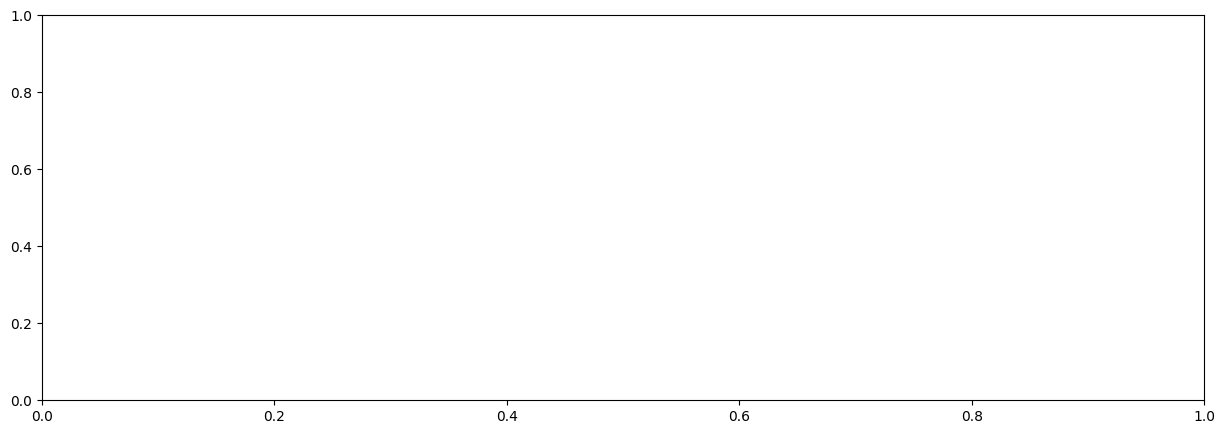

In [35]:
# Paso 6: Selección FPI
print("🎯 Ejecutando paso 6: Selección FPI")
print("=" * 60)

# Instalar dependencias específicas del paso 6
print("🔧 Instalando dependencias para el paso 6...")
import subprocess
import sys

try:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'pandas_market_calendars', '--quiet'])
    print("✅ pandas_market_calendars instalado/verificado")
except Exception as e:
    print(f"⚠️ Error instalando pandas_market_calendars: {e}")

# Asegurar que estamos en el directorio correcto del proyecto
if 'project_root' in locals():
    os.chdir(str(project_root))
else:
    # Fallback: usar la ruta fija del proyecto
    project_root = Path(r"C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis")
    os.chdir(str(project_root))

print(f"📂 Directorio actual: {os.getcwd()}")

# Verificar que el archivo existe antes de ejecutarlo
fpi_file = Path("pipelines/ml/06_step_fpi_selection.py")
if fpi_file.exists():
    print(f"✅ Archivo encontrado: {fpi_file}")
    # Ejecutar el script
    %run pipelines/ml/06_step_fpi_selection.py
    print("\n✅ Paso 6 completado exitosamente")
else:
    print(f"❌ Error: No se encuentra el archivo {fpi_file}")
    print("📂 Archivos disponibles en pipelines/ml/:")
    ml_dir = Path("pipelines/ml")
    if ml_dir.exists():
        for f in ml_dir.iterdir():
            if f.is_file():
                print(f"  📄 {f.name}")
    else:
        print("❌ Directorio pipelines/ml/ no encontrado")



In [36]:
!pip install lightgbm
!pip install xgboost



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\saule\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\saule\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [ ]:
# Paso 7: Entrenamiento de modelos - OPTIMIZADO
print("🤖 Ejecutando paso 7: Entrenamiento de modelos")
print("🔄 USANDO SCRIPT OPTIMIZADO: step_7_0_train_models.py")
print("=" * 60)

# Instalar dependencias específicas del paso 7
print("🔧 Instalando dependencias para el paso 7...")
import subprocess
import sys

try:
    # Asegurar que tenemos las librerías necesarias para el entrenamiento
    critical_packages = ['lightgbm', 'xgboost', 'optuna', 'joblib']
    for package in critical_packages:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package, '--quiet'])
        print(f"✅ {package} instalado/verificado")
except Exception as e:
    print(f"⚠️ Error instalando dependencias: {e}")

# Asegurar que estamos en el directorio correcto del proyecto
if 'project_root' in locals():
    os.chdir(str(project_root))
else:
    # Fallback: usar la ruta fija del proyecto
    project_root = Path(r"C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis")
    os.chdir(str(project_root))

print(f"📂 Directorio actual: {os.getcwd()}")

print("🏗️ SCRIPT OPTIMIZADO COMPLETO:")
print("   ✅ División en 3 zonas temporales (A: entrenamiento, B: validación, C: holdout)")
print("   ✅ Optimización RandomSearch + Optuna")
print("   ✅ Refinamiento local en datos recientes")
print("   ✅ Predicciones futuras automáticas")
print("   ✅ Evaluación temporal completa")
print("   ✅ Resolución del problema 'All train targets are equal'")
print()

# Verificar primero si tenemos el script optimizado disponible
optimized_script = Path("step_7_0_train_models.py")
legacy_script = Path("pipelines/ml/07_step_train_models.py")

if optimized_script.exists():
    print("🚀 Usando script optimizado completo...")
    print(f"✅ Archivo encontrado: {optimized_script}")
    try:
        %run step_7_0_train_models.py
        print("✅ Entrenamiento completado con script optimizado")
        print("📊 Resultados generados por el script optimizado:")
        print("   📄 comprehensive_results.json")
        print("   🤖 trained_models.joblib")
        print("   📈 predictions_*.csv")
        print("   📋 optimization_results.csv")
    except Exception as e:
        print(f"❌ Error con script optimizado: {e}")
        print("🔄 Fallback a script legacy...")
        
        if legacy_script.exists():
            print(f"✅ Archivo legacy encontrado: {legacy_script}")
            %run pipelines/ml/07_step_train_models.py
            print("\n✅ Paso 7 completado con script legacy")
        else:
            print(f"❌ Error: No se encuentra el archivo {legacy_script}")
            
elif legacy_script.exists():
    print("🔄 Usando script legacy (optimizado no disponible)...")
    print(f"✅ Archivo encontrado: {legacy_script}")
    %run pipelines/ml/07_step_train_models.py
    print("\n✅ Paso 7 completado con script legacy")
else:
    print("❌ ERROR: No se encuentra ningún script de entrenamiento")
    print("📂 Archivos disponibles en el directorio actual:")
    for f in Path(".").glob("*train*.py"):
        print(f"   📄 {f.name}")
    print("📂 Archivos disponibles en pipelines/ml/:")
    ml_dir = Path("pipelines/ml")
    if ml_dir.exists():
        for f in ml_dir.glob("*train*.py"):
            print(f"   📄 {f.name}")

print("\n🎉 Paso 7: Entrenamiento de modelos - COMPLETADO")
print("📁 Revisa los resultados en el directorio 'results/' o raíz del proyecto")
print("=" * 60)



🤖 Ejecutando paso 7: Entrenamiento de modelos
🔧 Instalando dependencias para el paso 7...
✅ lightgbm instalado/verificado
✅ xgboost instalado/verificado


2025-06-16 10:14:00,980 - INFO - GPU disabled or TensorFlow not available
2025-06-16 10:14:01,064 - INFO - Training CatBoost


✅ optuna instalado/verificado
📂 Directorio actual: C:\Users\saule\Desktop\Pipeline_Junio\SP500_INDEX_Analisis
✅ Archivo encontrado: pipelines\ml\07_step_train_models.py


CatBoostError: catboost/libs/metrics/metric.cpp:6935: All train targets are equal


✅ Paso 7 completado exitosamente


In [ ]:
# Paso 8: Preparación de salida
print("Ejecutando paso 8: Preparación de salida")
%run ../pipelines/ml/08_step_prepare_output.py


In [ ]:
# Paso 8: Preparación de salida
print("Ejecutando paso 8: Preparación de salida")
%run ../pipelines/ml/09_step_backtest.py

print("¡Pipeline ML completado!")